#  ANALYSIS OF WORLD COVID-19 DATA

This project uses covid-19 worldometer data set and world countries basic information data sets. I tried to compare how the cases count, death count, recovery count, and test count depends on the country's gdp,literacy as well ite region in WHO.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

We have downloaded both the data sets from kaggle.com , that has raw datas in csv file format

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/imdevskp/corona-virus-report' 
dataset_url2= 'https://www.kaggle.com/fernandol/countries-of-the-world'

In [3]:
import opendatasets as od



In [5]:
od.download(dataset_url)
od.download(dataset_url2)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hariharan0710
Your Kaggle Key: ········


 32%|███▏      | 6.00M/19.0M [00:00<00:00, 57.5MB/s]

100%|██████████| 19.0M/19.0M [00:00<00:00, 60.7MB/s]



Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hariharan0710
Your Kaggle Key: ········


100%|██████████| 13.4k/13.4k [00:00<00:00, 9.88MB/s]

The dataset has been downloaded and extracted.

In [6]:
# opting the directory
data_dir = './corona-virus-report'
data_dir2='./countries-of-the-world'

In [7]:
import os
os.listdir(data_dir)
os.listdir(data_dir2)

['countries of the world.csv']

Let us save and upload our work to Jovian before continuing.

In [8]:
project_name = "covid-19 world report" # change this (use lowercase letters and hyphens only)

In [9]:
!pip install jovian --upgrade -q

In [10]:
import jovian

In [11]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "hariharan071002/covid-19-world-report" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/hariharan071002/covid-19-world-report


'https://jovian.ai/hariharan071002/covid-19-world-report'

## Data Preparation and Cleaning

Since these datas are obtained from government and other sources, there can be errors, missing values.We should find them and prepare them , so that it can be used safely



In [12]:
!pip install pandas --upgrade --quiet

In [125]:
import pandas as pd

In [126]:
world_df = pd.read_csv(data_dir +"/worldometer_data.csv")
worldgdp_df=pd.read_csv(data_dir2 +"/countries of the world.csv",decimal=',')

The file containing datas of countries' gdp and literacy has errors that we get while processing,ie. the decimal values are in the form of aa,bb instead of aa.bb. so we use decimal=',' to change that

In [127]:
type(world_df)

pandas.core.frame.DataFrame

In [128]:
world_df

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


this is the data frame containing covid-19 datas , but has many NaNs and other unwanted columns for our analysis

In [99]:
world_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

we could see new cases,new deaths,new recovred has very less values, that we cant analysis with.

In [100]:
world_df.describe()

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,2.080000e+02,2.090000e+02,4.000000,188.000000,3.000000,2.050000e+02,3.000000,2.050000e+02,122.000000,208.000000,187.000000,1.910000e+02,191.000000
mean,3.041549e+07,9.171850e+04,1980.500000,3792.590426,300.000000,5.887898e+04,1706.000000,2.766433e+04,534.393443,3196.024038,98.681176,1.402405e+06,83959.366492
std,1.047661e+08,4.325867e+05,3129.611424,15487.184877,451.199512,2.566984e+05,2154.779803,1.746327e+05,2047.518613,5191.986457,174.956862,5.553367e+06,152730.591240
min,8.010000e+02,1.000000e+01,20.000000,1.000000,1.000000,7.000000e+00,42.000000,0.000000e+00,1.000000,3.000000,0.080000,6.100000e+01,4.000000
25%,9.663140e+05,7.120000e+02,27.500000,22.000000,40.500000,3.340000e+02,489.000000,8.600000e+01,3.250000,282.000000,6.000000,2.575200e+04,8956.500000
50%,7.041972e+06,4.491000e+03,656.000000,113.000000,80.000000,2.178000e+03,936.000000,8.990000e+02,27.500000,1015.000000,29.000000,1.357020e+05,32585.000000
75%,2.575614e+07,3.689600e+04,2609.000000,786.000000,449.500000,2.055300e+04,2538.000000,7.124000e+03,160.250000,3841.750000,98.000000,7.576960e+05,92154.500000
max,1.381345e+09,5.032179e+06,6590.000000,162804.000000,819.000000,2.576668e+06,4140.000000,2.292707e+06,18296.000000,39922.000000,1238.000000,6.313960e+07,995282.000000


one of the data of population is missing. wee should find that

In [101]:
world_df[world_df['Population'].isna()==True]    

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
156,Diamond Princess,NaN,NaN,712,NaN,13.0,NaN,651.0,NaN,48.0,4.0,NaN,NaN,NaN,NaN,NaN


that country  region is Diamond Princess , which is a cruise ship has been anchored at the Yokohama port in Japan since February 3, 2020. the datas of its population and other stuffs can be seen here https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7156812/

In [102]:
world_df["Population"][156]=2666+1045


<ipython-input-102-897df96dc3e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_df["Population"][156]=2666+1045


In [103]:
world1_df=world_df.drop(columns=['NewCases','NewDeaths','NewRecovered','Serious,Critical','Tot Cases/1M pop','Deaths/1M pop','Tests/1M pop'])
world1_df['death_ratio']=world1_df['TotalDeaths']*100/world1_df['TotalCases']

lets add a column in world1 data frame that contains death rate

In [104]:
world1_df

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalTests,WHO Region,death_ratio
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,63139605.0,Americas,3.235259
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,771258.0,13206188.0,Americas,3.381042
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,606387.0,22149351.0,South-EastAsia,2.055782
3,Russia,Europe,1.459409e+08,871894,14606.0,676357.0,180931.0,29716907.0,Europe,1.675204
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316.0,141264.0,3149807.0,Africa,1.784520
...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,1.0,10.0,2.0,61.0,NaN,7.692308
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,7.0,6.0,424.0,NaN,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,13.0,0.0,1816.0,NaN,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,12.0,0.0,NaN,Europe,NaN


In [105]:
worldgdp_df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [106]:
world_gdp_data_df=worldgdp_df.copy()
world_gdp_data_df=world_gdp_data_df.drop(columns=['Region','Population','Area (sq. mi.)','Pop. Density (per sq. mi.)','Coastline (coast/area ratio)','Net migration','Infant mortality (per 1000 births)','Phones (per 1000)','Arable (%)','Crops (%)','Other (%)','Climate','Birthrate','Deathrate','Agriculture','Industry','Service'])

world_gdp_data_df

,Country,GDP ($ per capita),Literacy (%)
0,Afghanistan,700.0,36.0
1,Albania,4500.0,86.5
2,Algeria,6000.0,70.0
3,American Samoa,8000.0,97.0
4,Andorra,19000.0,100.0
...,...,...,...
222,West Bank,800.0,NaN
223,Western Sahara,NaN,NaN
224,Yemen,800.0,50.2
225,Zambia,800.0,80.6


we have dropped unwanted columns from world gdp data , to speed up the analysis

In [107]:
world1_df.rename(columns={'Country/Region': 'Country'}, inplace=True)
world_gdp_data_df['Country']=world_gdp_data_df['Country'].str.rstrip()
world_gdp_data_df["Country"].replace({"United States": "USA", "United Kingdom": "UK"}, inplace=True)
merged_df = world1_df.merge(world_gdp_data_df, on="Country")
merged_df

,Country,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalTests,WHO Region,death_ratio,GDP ($ per capita),Literacy (%)
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,63139605.0,Americas,3.235259,37800.0,97.0
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,771258.0,13206188.0,Americas,3.381042,7600.0,86.4
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,606387.0,22149351.0,South-EastAsia,2.055782,2900.0,59.5
3,Russia,Europe,1.459409e+08,871894,14606.0,676357.0,180931.0,29716907.0,Europe,1.675204,8900.0,99.6
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316.0,141264.0,3149807.0,Africa,1.784520,10700.0,86.4
...,...,...,...,...,...,...,...,...,...,...,...,...
168,Laos,Asia,7.285750e+06,20,NaN,19.0,1.0,29374.0,WesternPacific,NaN,1700.0,66.4
169,Dominica,North America,7.200400e+04,18,NaN,18.0,0.0,1005.0,Americas,NaN,5400.0,94.0
170,Greenland,North America,5.678000e+04,14,NaN,14.0,0.0,5977.0,Europe,NaN,20000.0,NaN
171,Montserrat,North America,4.992000e+03,13,1.0,10.0,2.0,61.0,NaN,7.692308,3400.0,97.0


We have merged those two datasets based on the location/country

In [108]:
import jovian

In [109]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "hariharan071002/covid-19-world-report" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/hariharan071002/covid-19-world-report


'https://jovian.ai/hariharan071002/covid-19-world-report'

## Exploratory Analysis and Visualization

we will see how to extract datas, include datas and visualize them as for as our need is concerned



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [68]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [69]:
regionwise_df=world1_df.groupby('WHO Region')['TotalCases','TotalDeaths','TotalRecovered','ActiveCases'].sum()
regionwise_df['death_ratio']=regionwise_df['TotalDeaths']*100/regionwise_df['TotalCases']

regionwise_df

<ipython-input-69-6f186d51dd47>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  regionwise_df=world1_df.groupby('WHO Region')['TotalCases','TotalDeaths','TotalRecovered','ActiveCases'].sum()


,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,death_ratio
WHO Region,,,,,
Africa,852026,15538.0,604326.0,232162.0,1.823653
Americas,10452852,384637.0,6259733.0,3808482.0,3.679733
EasternMediterranean,1605866,42376.0,1340094.0,223396.0,2.638825
Europe,3544086,215564.0,2047446.0,566295.0,6.082358
South-EastAsia,2426899,50624.0,1621081.0,755194.0,2.085954
WesternPacific,267114,3975.0,182319.0,80820.0,1.488129


we have made a slice of the world1 data frame to check the counts based on WHO regions.
we infer that Americas region has the most infection but the death rate is highest in europe which might be due to its climatic condition and their higher older people population

In [70]:
highly_infected_countries=merged_df[merged_df["TotalCases"]>merged_df["TotalCases"].mean()]
highly_infected_countries.sort_values('TotalCases',ascending=False)


,Country,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalTests,WHO Region,death_ratio,GDP ($ per capita),Literacy (%)
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,63139605.0,Americas,3.235259,37800.0,"97,0"
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,771258.0,13206188.0,Americas,3.381042,7600.0,"86,4"
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,606387.0,22149351.0,South-EastAsia,2.055782,2900.0,"59,5"
3,Russia,Europe,1.459409e+08,871894,14606.0,676357.0,180931.0,29716907.0,Europe,1.675204,8900.0,"99,6"
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316.0,141264.0,3149807.0,Africa,1.784520,10700.0,"86,4"
5,Mexico,North America,1.290662e+08,462690,50517.0,308848.0,103325.0,1056915.0,Americas,10.918109,9000.0,"92,2"
6,Peru,South America,3.301632e+07,455409,20424.0,310337.0,124648.0,2493429.0,Americas,4.484760,5100.0,"90,9"
7,Chile,South America,1.913251e+07,366671,9889.0,340168.0,16614.0,1760615.0,Americas,2.696968,9900.0,"96,2"
8,Colombia,South America,5.093626e+07,357710,11939.0,192355.0,153416.0,1801835.0,Americas,3.337620,6300.0,"92,5"
9,Spain,Europe,4.675665e+07,354530,28500.0,NaN,NaN,7064329.0,Europe,8.038812,22000.0,"97,9"


to find the list of most affected countries, we have used .mean() on total cases, and we found that only 25 countries have total cases higher than mean, whic means a large no. of cases are in accomodated in fewer countries.

In [71]:
highly_infected_countries["positive_rate"]=highly_infected_countries['TotalCases']*100/highly_infected_countries['TotalTests']
highly_infected_countries["test percentage"]=highly_infected_countries['TotalTests']*100/highly_infected_countries['Population']
highly_infected_countries["activecases percentage"]=highly_infected_countries['ActiveCases']*100/highly_infected_countries['TotalCases']
highly_infected_countries

<ipython-input-71-d72937a4cb68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highly_infected_countries["positive_rate"]=highly_infected_countries['TotalCases']*100/highly_infected_countries['TotalTests']
<ipython-input-71-d72937a4cb68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highly_infected_countries["test percentage"]=highly_infected_countries['TotalTests']*100/highly_infected_countries['Population']
<ipython-input-71-d72937a4cb68>:3: SettingWithCopyWarning: 
A value is trying to be set on a c

,Country,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalTests,WHO Region,death_ratio,GDP ($ per capita),Literacy (%),positive_rate,test percentage,activecases percentage
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,63139605.0,Americas,3.235259,37800.0,"97,0",7.969925,19.063998,45.560919
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,771258.0,13206188.0,Americas,3.381042,7600.0,"86,4",22.092386,6.208521,26.435017
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,606387.0,22149351.0,South-EastAsia,2.055782,2900.0,"59,5",9.144327,1.603463,29.938990
3,Russia,Europe,1.459409e+08,871894,14606.0,676357.0,180931.0,29716907.0,Europe,1.675204,8900.0,"99,6",2.934000,20.362285,20.751490
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316.0,141264.0,3149807.0,Africa,1.784520,10700.0,"86,4",17.086253,5.304352,26.248272
5,Mexico,North America,1.290662e+08,462690,50517.0,308848.0,103325.0,1056915.0,Americas,10.918109,9000.0,"92,2",43.777409,0.818894,22.331367
6,Peru,South America,3.301632e+07,455409,20424.0,310337.0,124648.0,2493429.0,Americas,4.484760,5100.0,"90,9",18.264366,7.552111,27.370561
7,Chile,South America,1.913251e+07,366671,9889.0,340168.0,16614.0,1760615.0,Americas,2.696968,9900.0,"96,2",20.826302,9.202215,4.531037
8,Colombia,South America,5.093626e+07,357710,11939.0,192355.0,153416.0,1801835.0,Americas,3.337620,6300.0,"92,5",19.852539,3.537431,42.888373
9,Spain,Europe,4.675665e+07,354530,28500.0,NaN,NaN,7064329.0,Europe,8.038812,22000.0,"97,9",5.018594,15.108716,NaN


we have included positive rate, test percentage and active case percentage 

In [72]:
A_df=world1_df.groupby("Continent")['ActiveCases','TotalRecovered'].mean()
A_df


<ipython-input-72-20ad4b5dca00>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  A_df=world1_df.groupby("Continent")['ActiveCases','TotalRecovered'].mean()


,ActiveCases,TotalRecovered
Continent,,
Africa,5195.315789,12168.771930
Asia,22520.770833,73086.875000
Australia/Oceania,1472.333333,2103.333333
Europe,10801.386364,36075.045455
North America,72505.028571,90047.942857
South America,90874.142857,222582.142857


Asia is the most affected continent accounting for its origin of covid-19 as well as its highest population

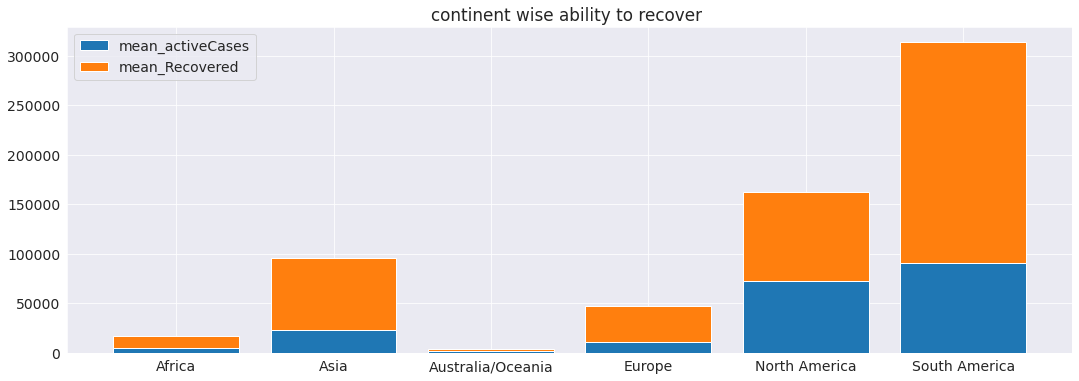

In [73]:
plt.figure(figsize=(18, 6))
plt.title('continent wise ability to recover ')
plt.bar(A_df.index,A_df["ActiveCases"])
plt.bar(A_df.index,A_df["TotalRecovered"], bottom =A_df["ActiveCases"]);
plt.legend(["mean_activeCases","mean_Recovered"]);

comparing continents, south america has pretty high count in recovered cases , may be due to its tropical climate and food style

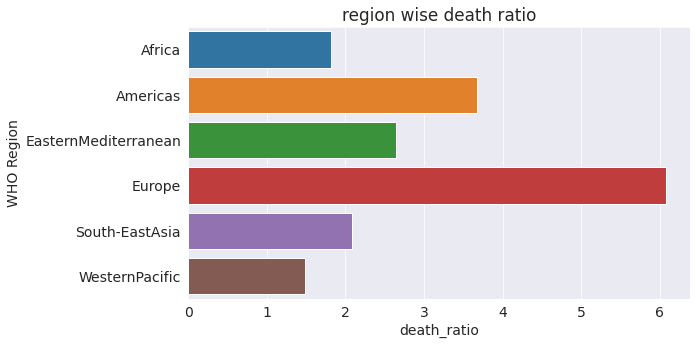

In [74]:
plt.title("region wise death ratio")
sns.barplot(x='death_ratio',y=regionwise_df.index,  data=regionwise_df);

death ratio is highest in europe region and americas also suffer from low immunity as they too have high death rates

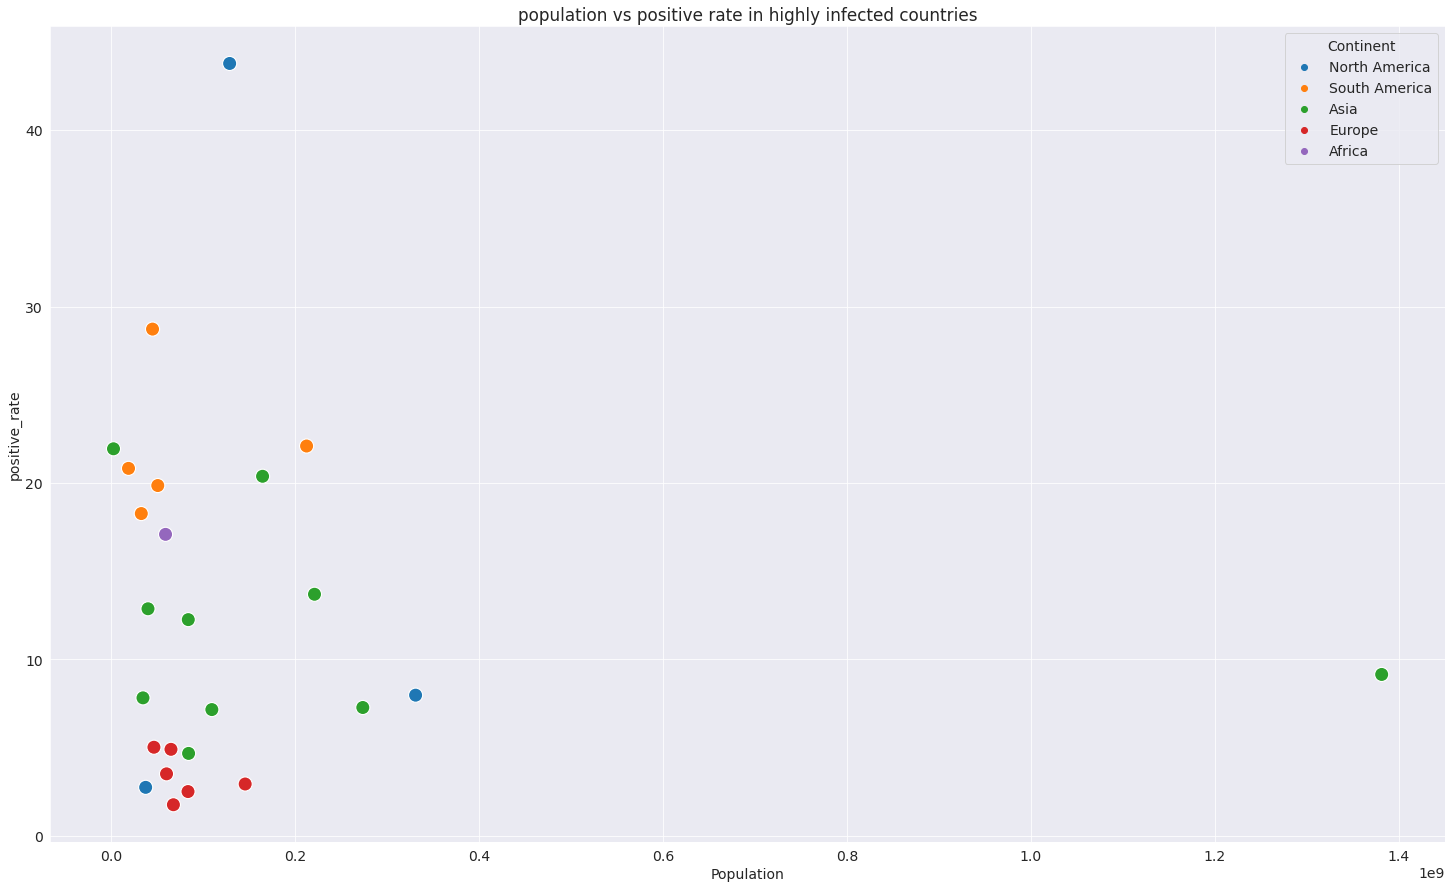

In [75]:
plt.figure(figsize=(25, 15))
plt.title('population vs positive rate in highly infected countries')
sns.scatterplot(x='Population', 
                y='positive_rate', 
                hue='Continent',
                s=200,
                data=highly_infected_countries);

this scatter plot informs that low population can expect to have less positive rate and the close contact chances are reduced

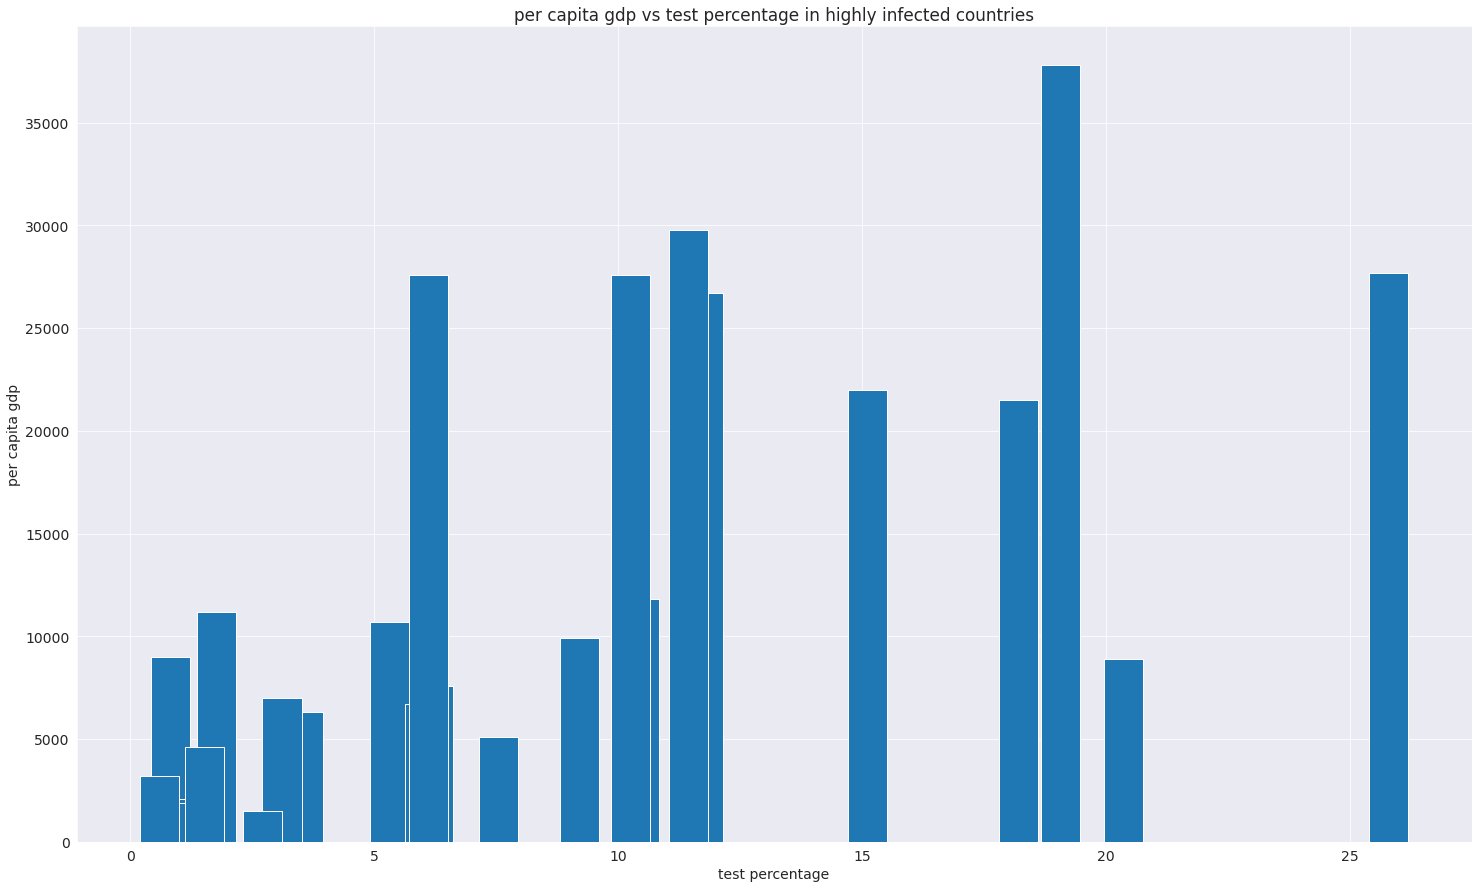

In [76]:
plt.figure(figsize=(25, 15))
plt.title("per capita gdp vs test percentage in highly infected countries")
plt.bar(highly_infected_countries['test percentage'],highly_infected_countries['GDP ($ per capita)'])
plt.xlabel("test percentage")
plt.ylabel("per capita gdp");

countries with test perccentage less than 5% have low per capita gdp, which can be because of its low economy level and less rt-pcr kit availability and countries with higher gdp has very high amount of test percentages

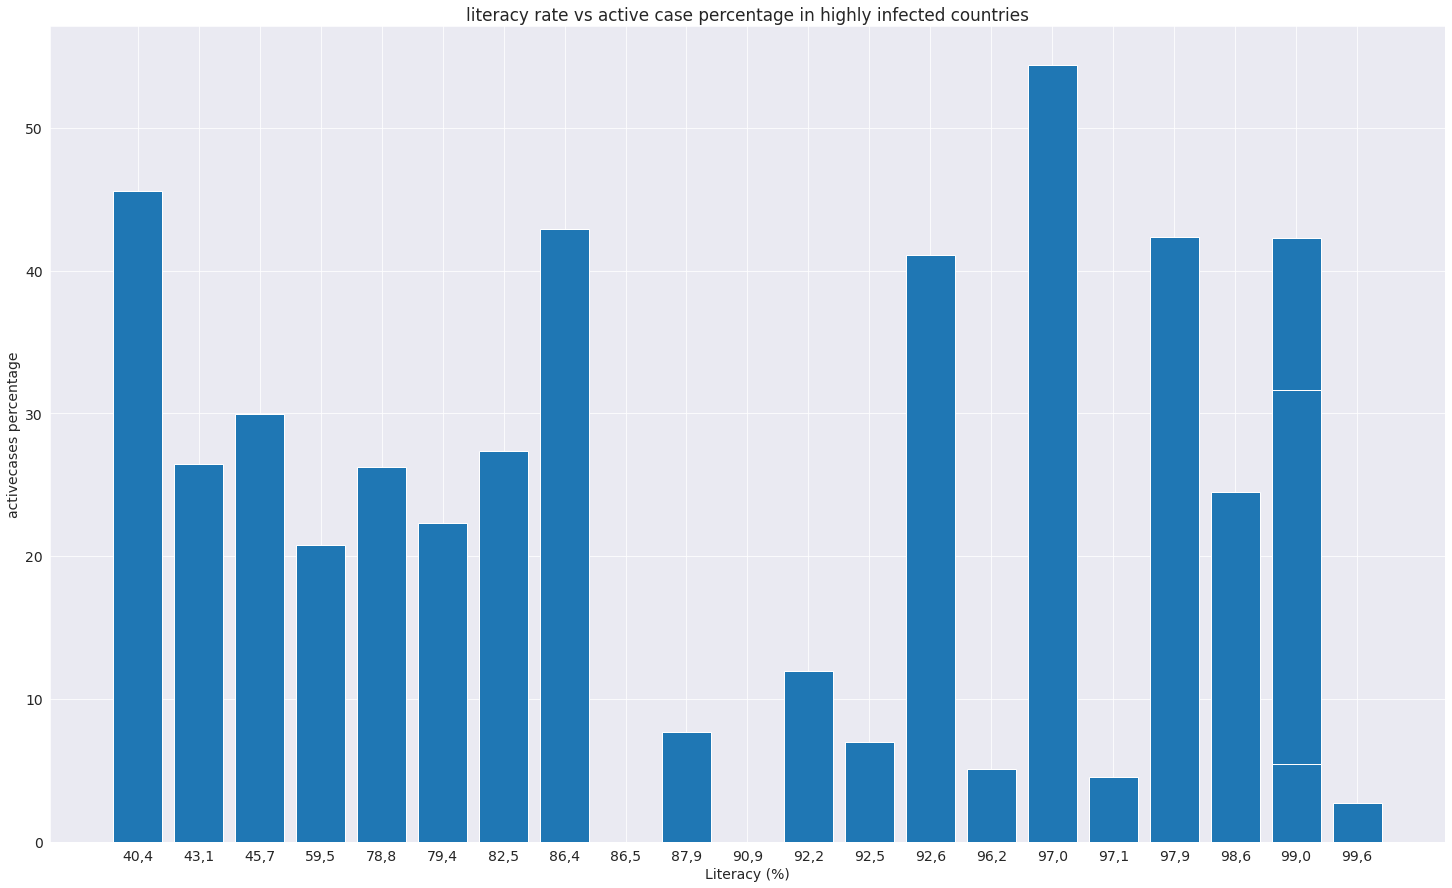

In [77]:
plt.figure(figsize=(25, 15))
plt.title("literacy rate vs active case percentage in highly infected countries")
plt.bar(highly_infected_countries['Literacy (%)'].sort_values(ascending=True),highly_infected_countries['activecases percentage'])
plt.xlabel("Literacy (%)")
plt.ylabel("activecases percentage");

we can infer from this plot that highly infected countries have both low literacy rate as well as higher literacy rate and active cases are relatively higher in low lteracy rate as the educated people population will be less and human resources to cure the diseases is less

In [78]:
import jovian

In [79]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "hariharan071002/covid-19-world-report" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/hariharan071002/covid-19-world-report


'https://jovian.ai/hariharan071002/covid-19-world-report'

## Asking and Answering Questions

here we have answered 5 interesting questions or showed light on the important statistics



#### Q1: 10 COUNTRIES WITH LEAST DEATH RATE BUT WITH  GDP PER CAPITA HIGHER THAN MEAN

In [80]:
merged_df[merged_df["GDP ($ per capita)"]>merged_df["GDP ($ per capita)"].mean()].sort_values(["death_ratio"],ascending=True).head(10)

,Country,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalTests,WHO Region,death_ratio,GDP ($ per capita),Literacy (%)
40,Singapore,Asia,5854932.0,54555,27.0,48031.0,6497.0,1474372.0,WesternPacific,0.049491,23700.0,"92,5"
24,Qatar,Asia,2807805.0,112092,178.0,108831.0,3083.0,511000.0,EasternMediterranean,0.158798,21500.0,"82,5"
46,Bahrain,Asia,1706669.0,42889,156.0,39945.0,2788.0,876700.0,EasternMediterranean,0.363730,16900.0,"89,1"
153,Cayman Islands,North America,65798.0,203,1.0,202.0,0.0,31108.0,NaN,0.492611,35000.0,"98,0"
115,Iceland,Europe,341465.0,1930,10.0,1825.0,95.0,149693.0,Europe,0.518135,30900.0,"99,9"
30,Oman,Asia,5118446.0,80713,492.0,70910.0,9311.0,309212.0,EasternMediterranean,0.609567,13100.0,"75,8"
36,Kuwait,Asia,4276658.0,70045,469.0,61610.0,7966.0,522200.0,EasternMediterranean,0.669570,19000.0,"83,5"
31,Israel,Asia,9197590.0,79559,576.0,53427.0,25556.0,1872453.0,Europe,0.723991,19800.0,"95,4"
133,Malta,Europe,441663.0,946,9.0,670.0,267.0,136713.0,Europe,0.951374,17700.0,"92,8"
12,Saudi Arabia,Asia,34865919.0,284226,3055.0,247089.0,34082.0,3635705.0,EasternMediterranean,1.074849,11800.0,"78,8"


#### Q2:  10 COUNTRIES WITH HIGHEST DEATH RATE IN ASIA

In [81]:
world1_df[world1_df["Continent"]=='Asia'].sort_values(["death_ratio"],ascending=False).head(10)

,Country,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalTests,WHO Region,death_ratio
131,Yemen,Asia,29886897.0,1768,508.0,898.0,362.0,120.0,EasternMediterranean,28.733032
10,Iran,Asia,84097623.0,320117,17976.0,277463.0,24678.0,2612763.0,EasternMediterranean,5.615447
145,Syria,Asia,17539600.0,999,48.0,311.0,640.0,NaN,EasternMediterranean,4.804805
22,Indonesia,Asia,273808365.0,118753,5521.0,75645.0,37587.0,1633156.0,South-EastAsia,4.649146
51,Kyrgyzstan,Asia,6534479.0,38659,1447.0,30099.0,7113.0,267718.0,Europe,3.742984
20,Iraq,Asia,40306025.0,140603,5161.0,101025.0,34417.0,1092741.0,EasternMediterranean,3.670619
52,Afghanistan,Asia,39009447.0,36896,1298.0,25840.0,9758.0,90396.0,EasternMediterranean,3.517997
16,Turkey,Asia,84428331.0,237265,5798.0,220546.0,10921.0,5081802.0,Europe,2.443681
48,Japan,Asia,126435859.0,42263,1026.0,28877.0,12360.0,938739.0,WesternPacific,2.427655
13,Pakistan,Asia,221295851.0,281863,6035.0,256058.0,19770.0,2058872.0,EasternMediterranean,2.141111


#### Q3: REGIONS WITH HIGHEST CASES

In [83]:
regionwise_df.sort_values(["TotalCases"],ascending=False)

,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,death_ratio
WHO Region,,,,,
Americas,10452852,384637.0,6259733.0,3808482.0,3.679733
Europe,3544086,215564.0,2047446.0,566295.0,6.082358
South-EastAsia,2426899,50624.0,1621081.0,755194.0,2.085954
EasternMediterranean,1605866,42376.0,1340094.0,223396.0,2.638825
Africa,852026,15538.0,604326.0,232162.0,1.823653
WesternPacific,267114,3975.0,182319.0,80820.0,1.488129


#### Q4: TOP 10 COUNTRIES WITH HIGHEST RECOVERY RATE  AND POPULATION HIGHER THAN MEAN, LITERACY RATE HIGHER THAN MEAN

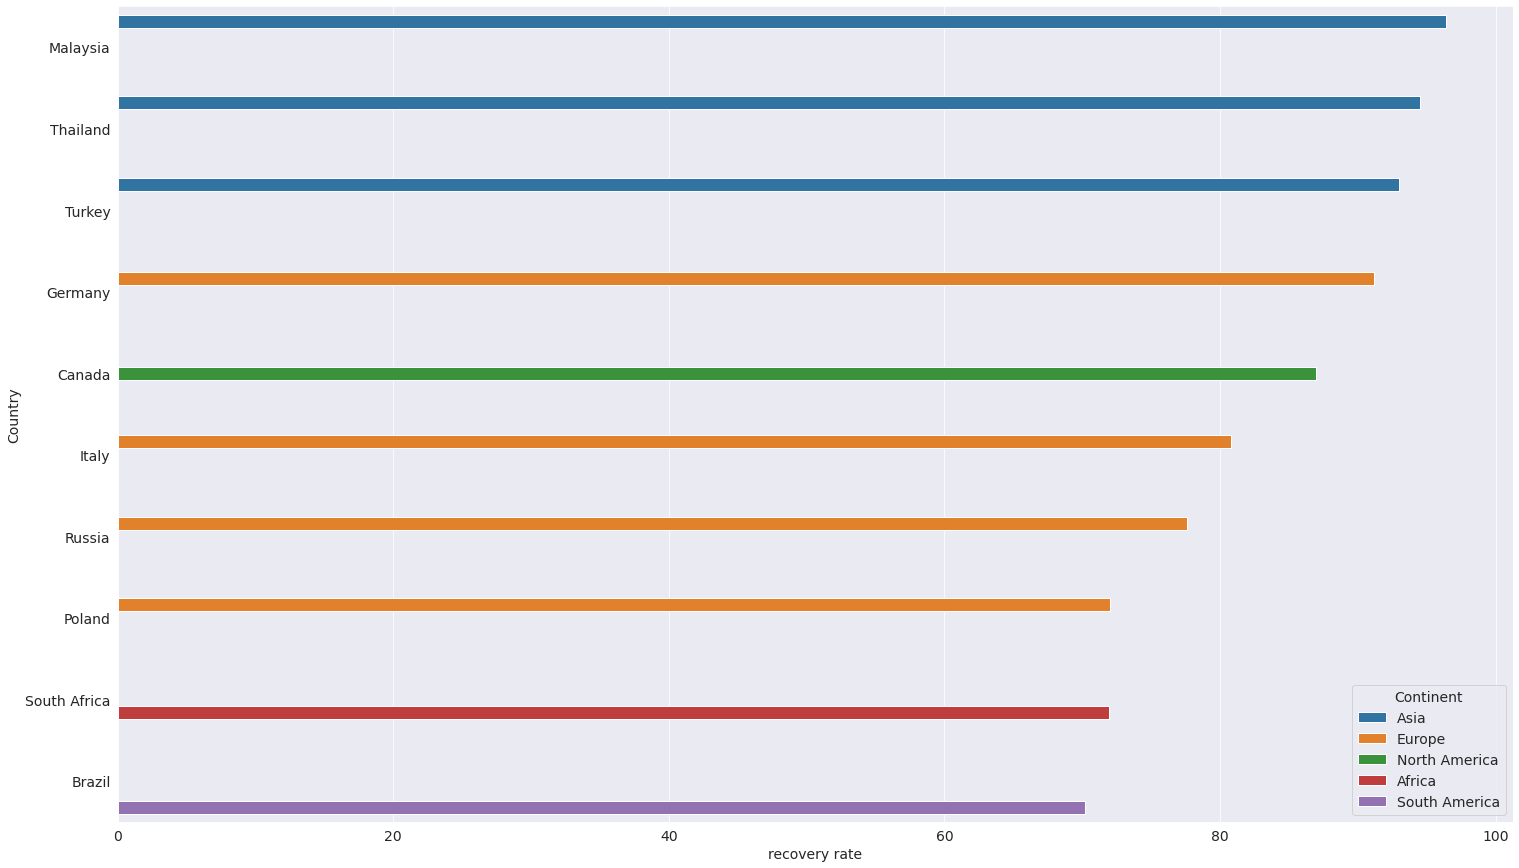

In [121]:
merged_df['recovery rate']=merged_df['TotalRecovered']*100/merged_df['TotalCases']
temp_df=merged_df[merged_df["Literacy (%)"]>merged_df["Literacy (%)"].mean() ].sort_values(["recovery rate"],ascending=False)
temp_df=temp_df[ temp_df["Population"]>temp_df["Population"].mean()].head(10)
plt.figure(figsize=(25, 15))
sns.barplot(x='recovery rate', y='Country', hue='Continent', data=temp_df);

#### Q5: TOP 10 COUNTRIES WITH HIGHEST TEST RATIO AND POPULATION HIGHER THAN MEAN, PER CAPITA GDP HIGHER THAN MEAN

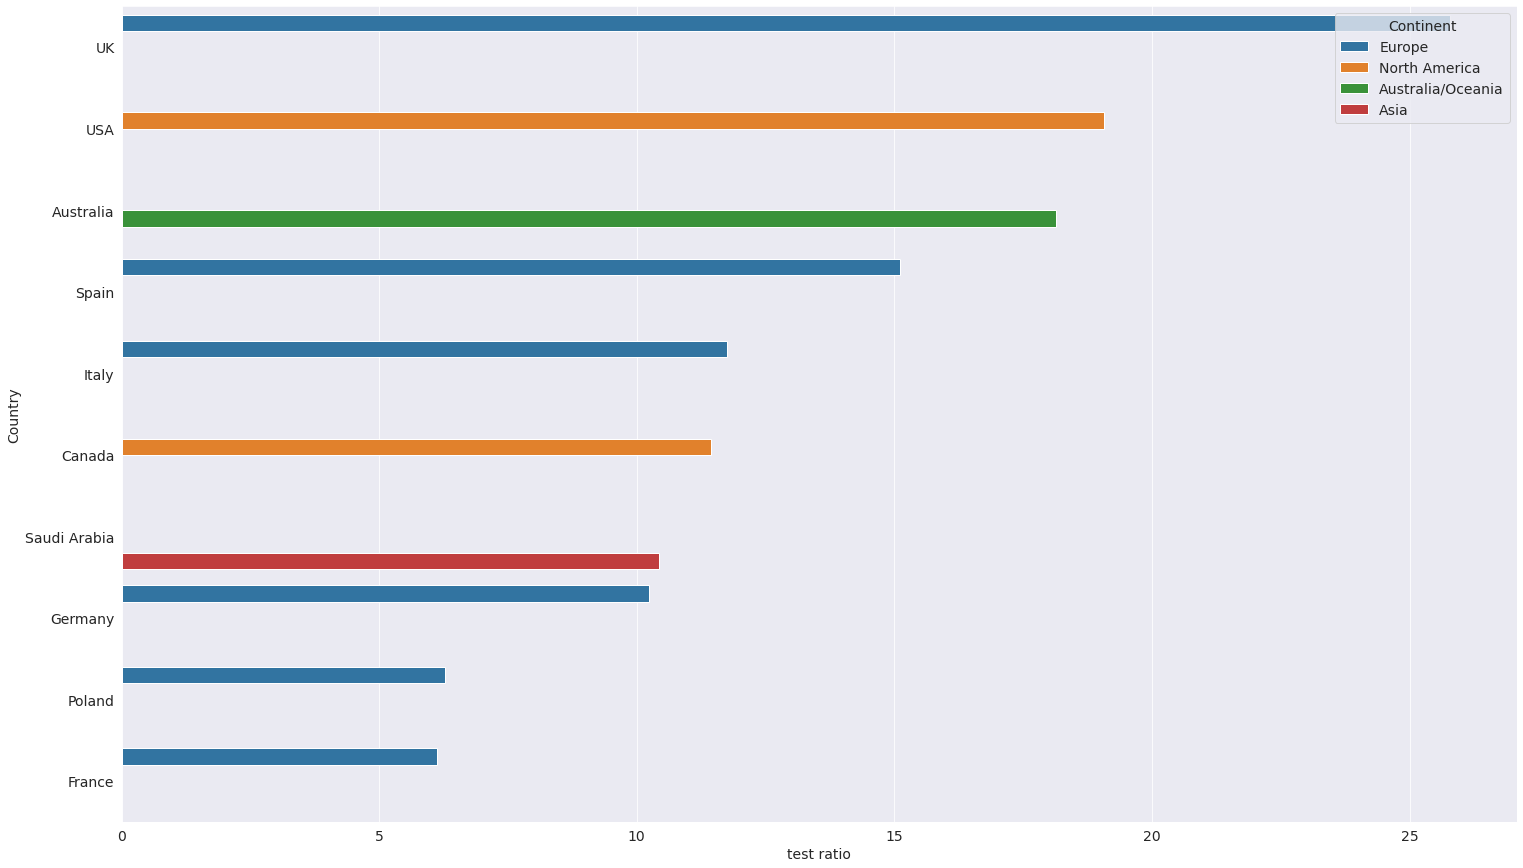

In [122]:
merged_df['test ratio']=merged_df['TotalTests']*100/merged_df['Population']
temp_df=merged_df[merged_df["GDP ($ per capita)"]>merged_df["GDP ($ per capita)"].mean() ].sort_values(["test ratio"],ascending=False)
temp_df=temp_df[ temp_df["Population"]>temp_df["Population"].mean()].head(10)
plt.figure(figsize=(25, 15))
sns.barplot(x='test ratio', y='Country', hue='Continent', data=temp_df);

Let us save and upload our work to Jovian before continuing.

In [129]:
import jovian

In [130]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "hariharan071002/covid-19-world-report" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/hariharan071002/covid-19-world-report


'https://jovian.ai/hariharan071002/covid-19-world-report'

## Inferences and Conclusion

1)Americas region has the most infection but the death rate is highest in europe which might be due to its climatic condition and their higher older people population

2)we found that only 25 countries have total cases higher than mean, whic means a large no. of cases are in accomodated in fewer countries.

3)Asia is the most affected continent accounting for its origin of covid-19 as well as its highest population

4)south america has pretty high count in recovered cases , may be due to its tropical climate and food style

5)low population can expect to have less positive rate and the close contact chances are reduced

6)countries with test perccentage less than 5% have low per capita gdp, which can be because of its low economy level and less rt-pcr kit availability and countries with higher gdp has very high amount of test percentages

7)highly infected countries have both low literacy rate as well as higher literacy rate and active cases are relatively higher in low lteracy rate as the educated people population will be less and human resources to cure the diseases is less

8)singapore had the best use of its human resource to reduce the death rates in their country

9)similarly, in Asia, yeman had failed to reduce the death rates and accounts for its poor medical infrastructure

10)malaysia , though it has high population density,due to its medical infrastructure and food styles, it managed to have very high recovery rates

11)UK has very high test ratio , though it has pretty high population comparing to mean of the world

In [131]:
import jovian

In [132]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "hariharan071002/covid-19-world-report" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/hariharan071002/covid-19-world-report


'https://jovian.ai/hariharan071002/covid-19-world-report'

## References and Future Work

future work is to analyse data for each countries based on their parliament budget in research and development and medical sectors.

In [1]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>